In [74]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Paths to your training and test datasets
train_data_dir = "C:\\Users\payal\\OneDrive\\Desktop\\DL COdes\\11 Flowers\\train"  # Update this path
test_data_dir = "C:\\Users\payal\\OneDrive\\Desktop\\DL COdes\\11 Flowers\\test"    # Update this path

# Image size and batch size
img_size = (224, 224)
batch_size = 32

# Define image data generators for training, validation, and test data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Set aside 20% of training data for validation
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load training and validation data
train_data = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training"
)

val_data = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation"
)

# Load test data
test_data = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False  # Important for consistent evaluation
)

# Load the MobileNetV2 model and add custom layers for flower classification
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights="imagenet")
base_model.trainable = False  # Freeze the base model

# Build the full model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.2),
    layers.Dense(1024, activation='relu'),
    layers.Dense(train_data.num_classes, activation="softmax")
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Train the model
epochs = 2
history = model.fit(
    train_data,
    epochs=epochs,
    validation_data=val_data
)

# Save the model
model.save("flower_object_detection_model.h5")
print("Model saved as flower_object_detection_model.h5")

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Make predictions on test data
predictions = model.predict(test_data)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_data.classes

# Calculate accuracy and display classification report
test_acc = accuracy_score(true_classes, predicted_classes)
print(f"Accuracy on test data: {test_acc * 100:.2f}%")

# Generate a detailed classification report
class_names = list(test_data.class_indices.keys())
report = classification_report(true_classes, predicted_classes, target_names=class_names)
print(report)


Found 2602 images belonging to 5 classes.


<>:10: SyntaxWarning: invalid escape sequence '\p'
<>:11: SyntaxWarning: invalid escape sequence '\p'
<>:10: SyntaxWarning: invalid escape sequence '\p'
<>:11: SyntaxWarning: invalid escape sequence '\p'
C:\Users\payal\AppData\Local\Temp\ipykernel_4676\2295951535.py:10: SyntaxWarning: invalid escape sequence '\p'
  train_data_dir = "C:\\Users\payal\\OneDrive\\Desktop\\DL COdes\\11 Flowers\\train"  # Update this path
C:\Users\payal\AppData\Local\Temp\ipykernel_4676\2295951535.py:11: SyntaxWarning: invalid escape sequence '\p'
  test_data_dir = "C:\\Users\payal\\OneDrive\\Desktop\\DL COdes\\11 Flowers\\test"    # Update this path


Found 648 images belonging to 5 classes.
Found 530 images belonging to 5 classes.
Epoch 1/2
82/82 ━━━━━━━━━━━━━━━━━━━━ 71s 797ms/step - accuracy: 0.6834 - loss: 0.8992 - val_accuracy: 0.8642 - val_loss: 0.3995
Epoch 2/2
82/82 ━━━━━━━━━━━━━━━━━━━━ 48s 588ms/step - accuracy: 0.8990 - loss: 0.2864 - val_accuracy: 0.8750 - val_loss: 0.3678


Model saved as flower_object_detection_model.h5
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 441ms/step - accuracy: 0.8941 - loss: 0.3036
Test Loss: 0.355206161737442
Test Accuracy: 0.8792452812194824
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 525ms/step
Accuracy on test data: 87.92%
              precision    recall  f1-score   support

       daisy       0.88      0.83      0.86        72
   dandelion       0.91      0.95      0.93       110
       roses       0.84      0.95      0.90       108
  sunflowers       0.82      0.92      0.86       108
      tulips       0.96      0.75      0.84       132

    accuracy                           0.88       530
   macro avg       0.88      0.88      0.88       530
weighted avg       0.89      0.88      0.88       530



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


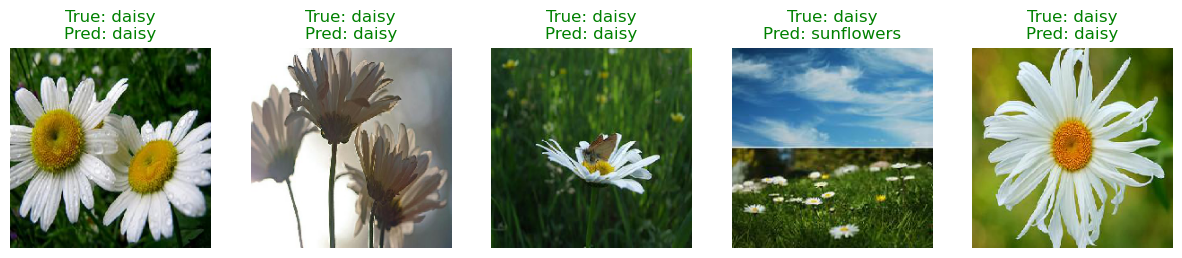

In [78]:
import matplotlib.pyplot as plt

# Get class labels
class_names = list(test_data.class_indices.keys())

# Select a batch of images from the test set
images, true_labels = next(test_data)  # Get a batch of images and labels
predicted_probs = model.predict(images)
predicted_labels = np.argmax(predicted_probs, axis=1)
true_labels = np.argmax(true_labels, axis=1)

# Display a few images with predictions and actual labels
num_images = 5  # Number of images to display
plt.figure(figsize=(15, 10))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(images[i])
    plt.axis('off')
    true_label = class_names[true_labels[i]]
    predicted_label = class_names[predicted_labels[i]]
    plt.title(f"True: {true_label}\nPred: {predicted_label}", color=color)

plt.show()
